#                            LEAD SCORING CASE STUDY

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',500)

In [4]:
#Reading the data
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Checking shape of dataset
lead_data.shape

(9240, 37)

In [6]:
#Checking info about columns
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
#Checking stastical information about numerical columns
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Checking duplicate values in the dataset
lead_data.duplicated().sum()

0

##### There are no duplicate values in the dataset

### DATA PREPARATION

In [9]:
#Replacing "Select" in various columns with null. In these columns users have not selected any option so the default option
#select has been placed and it is equivalent to null value.

lead_data = lead_data.replace("Select",np.nan)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#Let us check the null values in dataset
lead_data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#Let's see null values in terms of percentage
null_percent = round(100*(lead_data.isna().sum()/len(lead_data)),2).sort_values(ascending=False)
null_percent

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [12]:
#Let us remove the columns which have more than 40% null values
null_col_40 = null_percent[null_percent>40].sort_values(ascending=False)
null_col_40

How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [13]:
lead_data.drop(columns=null_col_40.index,axis=1,inplace=True)
lead_data.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [14]:
#Checking null values again
round(100*(lead_data.isna().sum()/len(lead_data)),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

In [15]:
#Let us check individual columns with high null value percentage
#City Column
lead_data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
#Since majority of city include Mumbai, let us impute Mumbai for the null values of City.
lead_data['City'] = lead_data['City'].replace(np.nan,'Mumbai')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


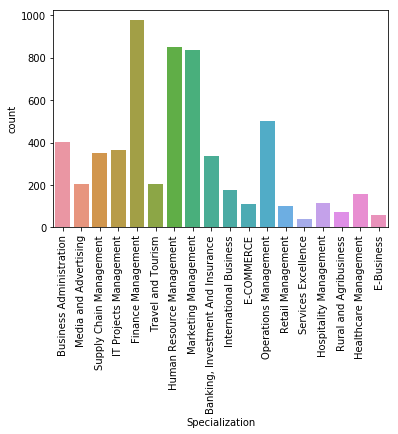

In [17]:
#Let us check the next column with high percent of null values
#Specialization
sns.countplot(data = lead_data, x='Specialization')
plt.xticks(rotation=90)
plt.show()

In [18]:
#Let us create a separate category for these null values. There may be people who are not specialists or students who
#do not have any work experience. Let us create separate category of 'Other Specialization'
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan,'Other Specialization')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


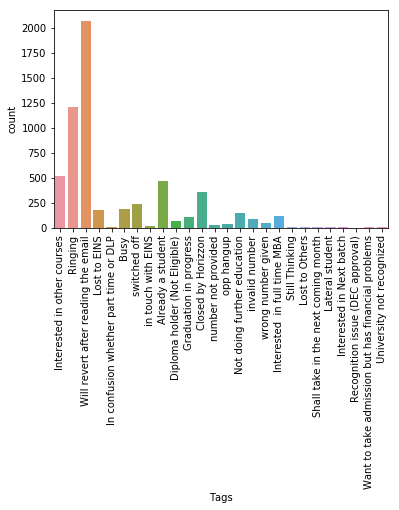

In [19]:
#Let us check the next column
#Tags
sns.countplot(data=lead_data,x='Tags')
plt.xticks(rotation=90)
plt.show()

In [20]:
#Let us replace the null values with 'Will revert after reading the email'
lead_data['Tags'] = lead_data['Tags'].replace(np.nan,'Will revert after reading the email')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

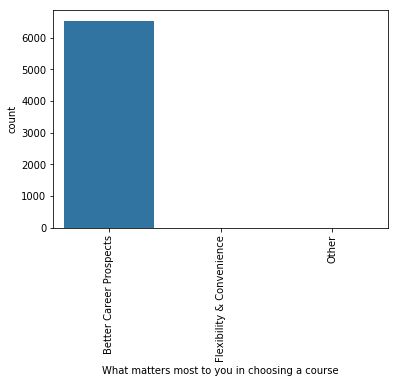

In [21]:
#Let us check the next column
#What matters most to you in choosing a course
sns.countplot(data=lead_data,x='What matters most to you in choosing a course')
plt.xticks(rotation=90)

In [22]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
#We can see that this column has 99% similar values and is hence is highly skewed(imbalanced). So we can drop the column.

In [24]:
lead_data.drop('What matters most to you in choosing a course', axis=1, inplace=True)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [25]:
#Checking the next column
#What is your current occupation
lead_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [26]:
#Let us impute the null values with Unemployed
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan,'Unemployed')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [27]:
#Since this column is also skewed(85% values are same) we can drop this column also.

In [28]:
#lead_data.drop('What is your current occupation', axis=1, inplace=True)
#lead_data.head()

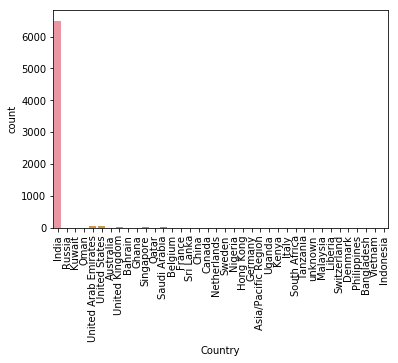

In [29]:
#Checking the next column
#Country
sns.countplot(data=lead_data,x='Country')
plt.xticks(rotation=90)
plt.show()

In [30]:
#We can see that majority of values is India. Let us impute the null values with India.

In [31]:
lead_data['Country'] = lead_data['Country'].replace(np.nan,'India')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [32]:
lead_data['Country'].value_counts(normalize=True)

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
Germany                 0.000433
Nigeria                 0.000433
South Africa            0.000433
Canada                  0.000433
Sweden                  0.000325
Belgium                 0.000216
Asia/Pacific Region     0.000216
Philippines             0.000216
Italy                   0.000216
Netherlands             0.000216
Bangladesh              0.000216
Ghana                   0.000216
Uganda                  0.000216
China                   0.000216
Kenya                   0.000108
Vietnam                 0.000108
Tanzania  

In [33]:
#As we can see 96% of values are India(skewed,imbalanced), we can drop this column as it won't be useful for model.

In [34]:
lead_data.drop('Country',axis=1,inplace=True)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [35]:
#For rest of the columns we have null values less than 2% so we can drop the null value rows for these

In [36]:
lead_data.dropna(axis=0, inplace=True)

In [37]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [38]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
# We can delete Prospect ID and Lead Number columns as well as they are static IDs and won't provide much insights to model.
lead_data.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [40]:
#Checking null values again
round(100*(lead_data.isna().sum()/len(lead_data)),2).sort_values(ascending=False)

Last Notable Activity                       0.0
A free copy of Mastering The Interview      0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

In [41]:
#All the null values are handled.Let us check the shape of dataset
lead_data.shape

(9074, 26)

In [42]:
#Let us check the percentage of rows retained after imputation and removals.
100*(lead_data.shape[0]/9240) #9240 - Total number of initial rows
#We have retained 98% rows after imputation and deletion.

98.2034632034632

In [43]:
#Converting binary variables(yes/No) to 1/0.
yes_no_var = ["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums"
              ,"Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses"
              ,"Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"
              ,"A free copy of Mastering The Interview"]

In [44]:
def map_func(x):
    return x.map({'Yes':1,'No':0})

In [45]:
lead_data[yes_no_var] = lead_data[yes_no_var].apply(map_func)

In [46]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Mumbai,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


# Exploratory Data Analysis

## Univariate Analysis

In [47]:
lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Converted

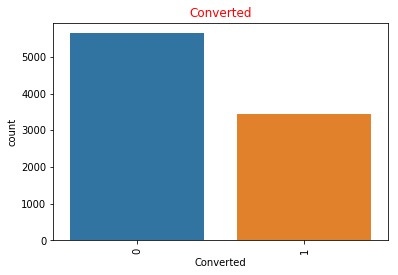

In [48]:
sns.countplot(data=lead_data, x= 'Converted')
plt.title('Converted', color='Red')
plt.xticks(rotation=90)
plt.show()

In [49]:
#Let us check the percentage of convertion
100*(len(lead_data[lead_data['Converted']==1])/len(lead_data['Converted']))

37.85541106458012

In [50]:
#We have a convertion rate of 37%

### Lead Origin

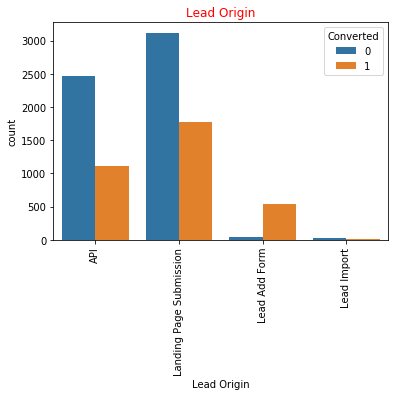

In [51]:
sns.countplot(data=lead_data, hue='Converted', x= 'Lead Origin')
plt.title('Lead Origin', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference
- We can observe that API and Landing Page Submission generate most number of leads.

- Conversion rate is best for Lead Add Form

- We can focus on incresing number of leads for Lead Add Form as it provides high conversion rate and also improve convertion rate of API and Landing Page Submission leads.

### Lead Source

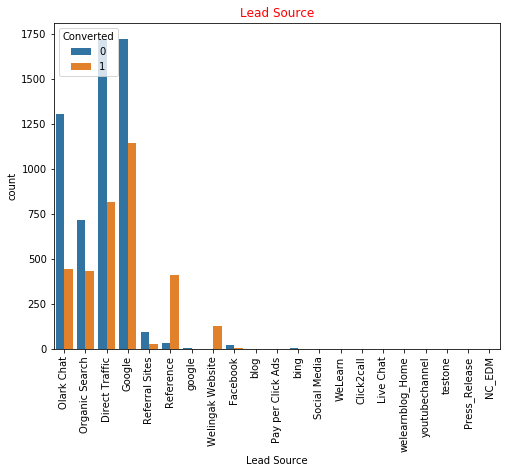

In [52]:
plt.figure(figsize=[8,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Lead Source')
plt.title('Lead Source', color='Red')
plt.xticks(rotation=90)
plt.show()

In [53]:
#Let us correct the discrepancy in columns
#Google and google
#Also let us combine low value count columns together into Others category
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google','Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','Social Media',
                                                            'NC_EDM','youtubechannel','testone','welearnblog_Home',
                                                             'Pay per Click Ads','WeLearn','blog'],'Other Sources')

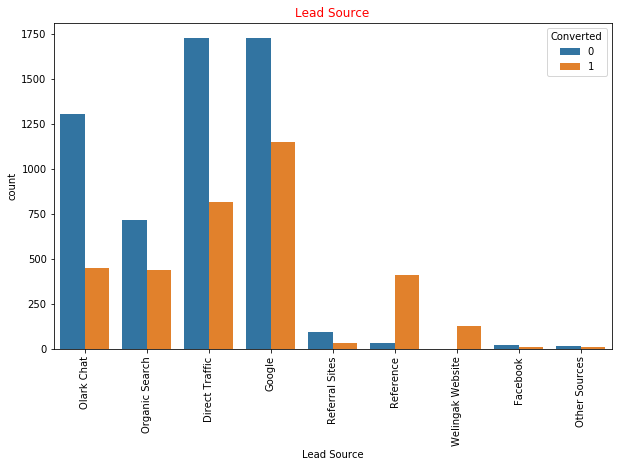

In [54]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Lead Source')
plt.title('Lead Source', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference
- Google and Direct Traffic generates lot of leads
- Reference leads and leads from Welingak Website shows best convertion rates.

- We can try increasing number of leads from references and Welingak Website and also improve convertion rate in high lead categories.

### Do Not Email

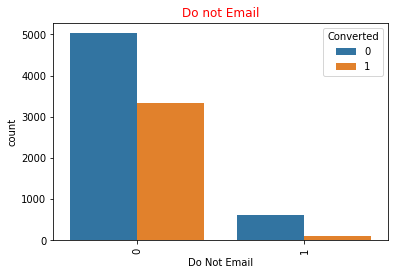

In [55]:
sns.countplot(data=lead_data, hue='Converted', x= 'Do Not Email')
plt.title('Do not Email', color='Red')
plt.xticks(rotation=90)
plt.show()

#### inference 
- This column doesn't provide much useful information and is also skewed and imbalanced and may hamper the model

### Do Not Call

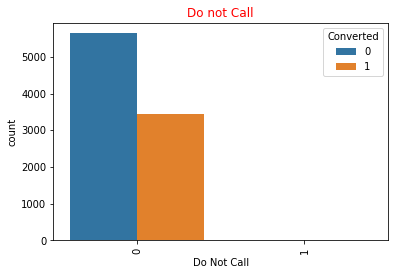

In [56]:
sns.countplot(data=lead_data, hue='Converted', x= 'Do Not Call')
plt.title('Do not Call', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference
- This column doesn't provide much useful information and is also skewed and imbalanced and may hamper the model

### TotalVisits

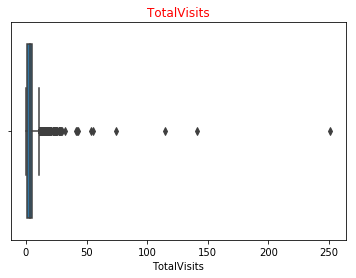

In [57]:
sns.boxplot(data=lead_data, x='TotalVisits')
plt.title('TotalVisits',color='Red')
plt.show()

In [58]:
# We are having Outliers in this column. Let us check various percentiles to confirm this and remove the outliers

In [59]:
lead_data['TotalVisits'].quantile([0.2,0.4,0.6,0.8,0.9,0.95,0.99,1])

0.20      0.0
0.40      2.0
0.60      3.0
0.80      5.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [60]:
# We can observe that there is sudden spike in quantile values. Let us cap the values at 95 percentile and also for lower values 
lead_data['TotalVisits'][lead_data['TotalVisits']>=lead_data['TotalVisits'].quantile(0.95)] = lead_data['TotalVisits'].quantile(0.95)
lead_data['TotalVisits'][lead_data['TotalVisits']<=lead_data['TotalVisits'].quantile(0.05)] = lead_data['TotalVisits'].quantile(0.05)

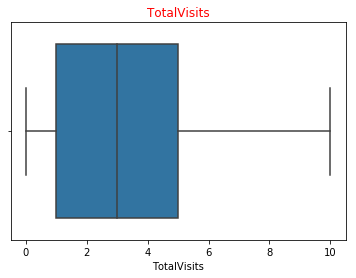

In [61]:
sns.boxplot(data=lead_data, x='TotalVisits')
plt.title('TotalVisits',color='Red')
plt.show()

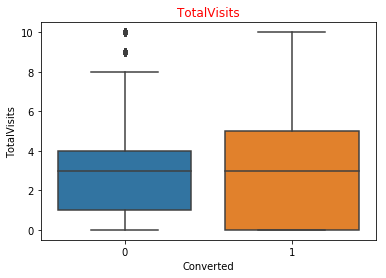

In [62]:
sns.boxplot(data=lead_data, y='TotalVisits', x='Converted')
plt.title('TotalVisits',color='Red')
plt.show()

#### Inference 
- Median for both converted and non-converted is same.

### Total Time Spent on Website

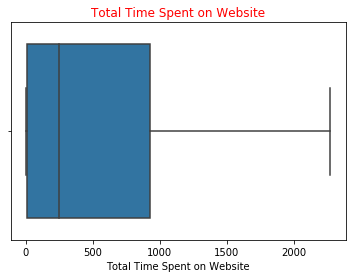

In [63]:
sns.boxplot(data=lead_data, x='Total Time Spent on Website')
plt.title('Total Time Spent on Website',color='Red')
plt.show()

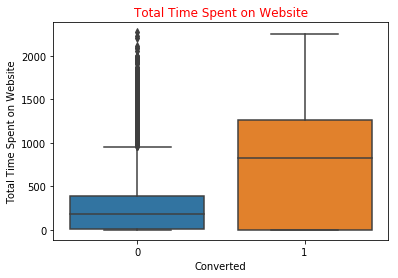

In [64]:
sns.boxplot(data=lead_data, y='Total Time Spent on Website', x='Converted')
plt.title('Total Time Spent on Website',color='Red')
plt.show()

#### Inference 
- We can observe that leads who spend more time on website are likely to be converted.
- Website can be made more appealing and user friendly and also offers can be posted on websites so that leads focus more
on taking up the course.

### Page Views Per Visit

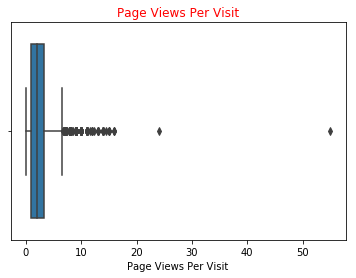

In [65]:
sns.boxplot(data=lead_data, x='Page Views Per Visit')
plt.title('Page Views Per Visit',color='Red')
plt.show()

In [66]:
lead_data['Page Views Per Visit'].quantile([0.2,0.4,0.6,0.8,0.9,0.95,0.99,1])

0.20     0.0
0.40     2.0
0.60     2.5
0.80     4.0
0.90     5.0
0.95     6.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

In [67]:
# We can observe outliers in this case as well. Let us cap upper(95%) and lower(5%) levels.
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit']>=lead_data['Page Views Per Visit'].quantile(0.95)] = lead_data['Page Views Per Visit'].quantile(0.95)
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit']<=lead_data['Page Views Per Visit'].quantile(0.05)] = lead_data['Page Views Per Visit'].quantile(0.05)

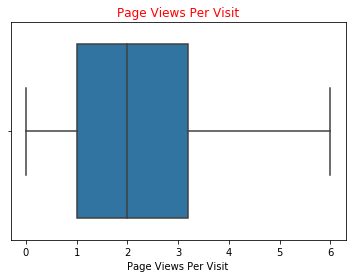

In [68]:
sns.boxplot(data=lead_data, x='Page Views Per Visit')
plt.title('Page Views Per Visit',color='Red')
plt.show()

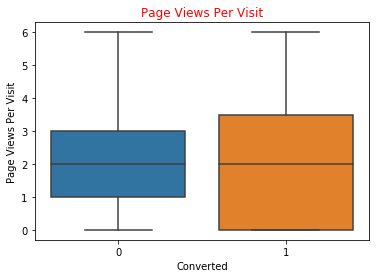

In [69]:
sns.boxplot(data=lead_data, y='Page Views Per Visit', x='Converted')
plt.title('Page Views Per Visit',color='Red')
plt.show()

#### Inference

- Median is same for both converted and non-converted cases.

### Last Activity

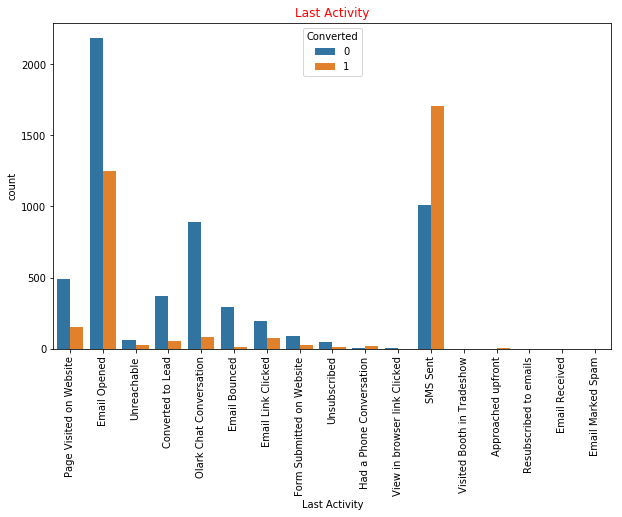

In [70]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Last Activity')
plt.title('Last Activity', color='Red')
plt.xticks(rotation=90)
plt.show()

In [71]:
#Let us club the low value counts together into 'Other Activity' category.

In [72]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked',
                                                                'Approached upfront','Email Marked Spam','Email Received',
                                                                'Visited Booth in Tradeshow','Resubscribed to emails'],
                                                               'Other Activity')

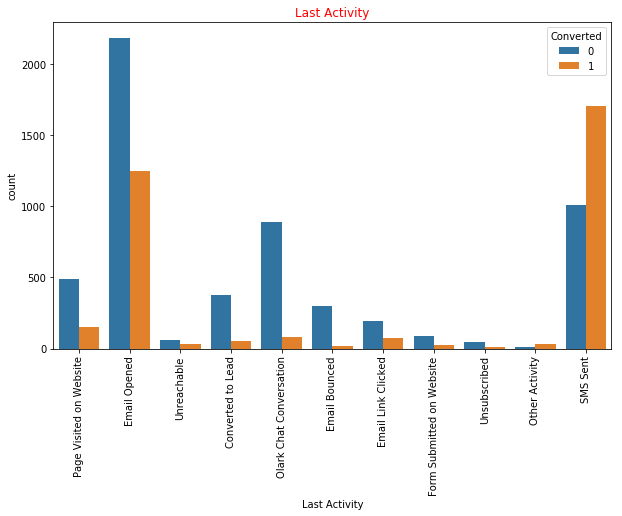

In [73]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Last Activity')
plt.title('Last Activity', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference
- Leads whose last activity was SMS sent has best convertion rates.
- Also large number of leads also have Email Opened as their last activity.

### Specialization

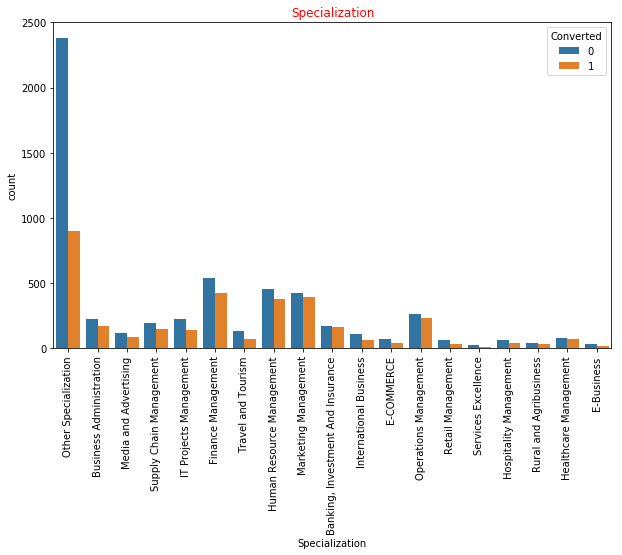

In [74]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Specialization')
plt.title('Specialization', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference
- We can observe that Management related leads show good convertion rated. We can focus more on such profiles.

### Search

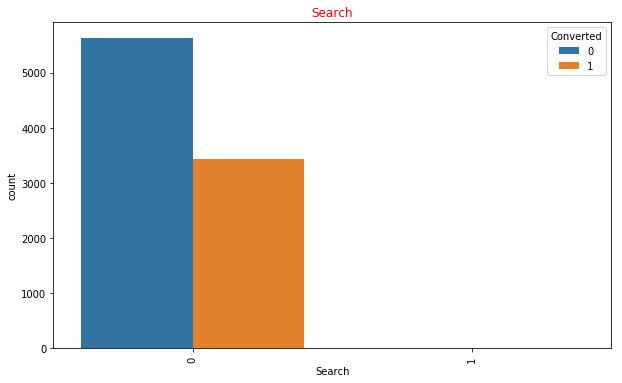

In [75]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Search')
plt.title('Search', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference
- We can observe that this column is biased and shows imbalance, hence it won't be useful for analysis. We can drop this column.


### Magazine

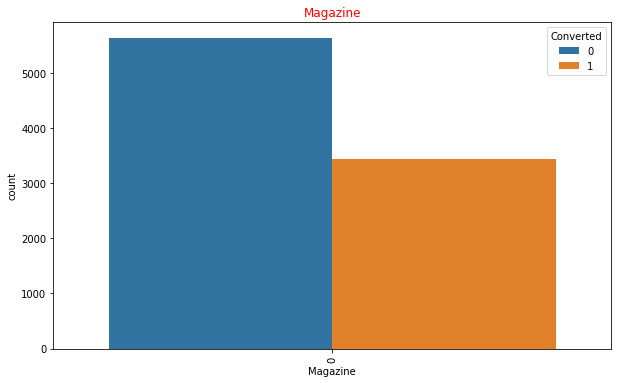

In [76]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Magazine')
plt.title('Magazine', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference
- This column has only one category of variable so it won't have much effect on the model. We can drop this column.

### Newspaper Article

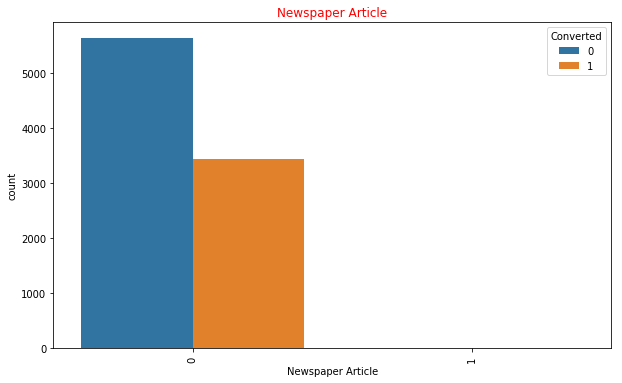

In [77]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Newspaper Article')
plt.title('Newspaper Article', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference
- This column is biased and is not useful for the model. We can drop this column.

### X Education Forums

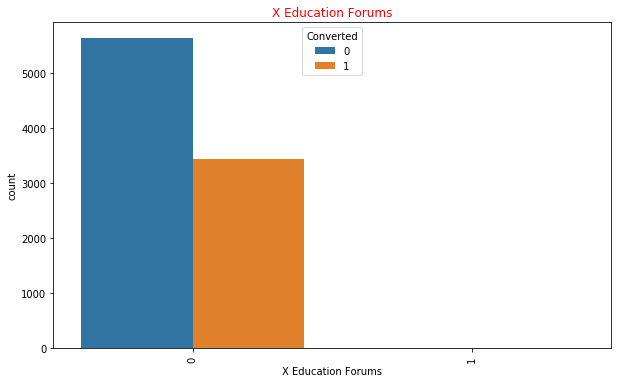

In [78]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'X Education Forums')
plt.title('X Education Forums', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference
- This column is biased and won't be useful for the model. We can drop this column.

### Newspaper

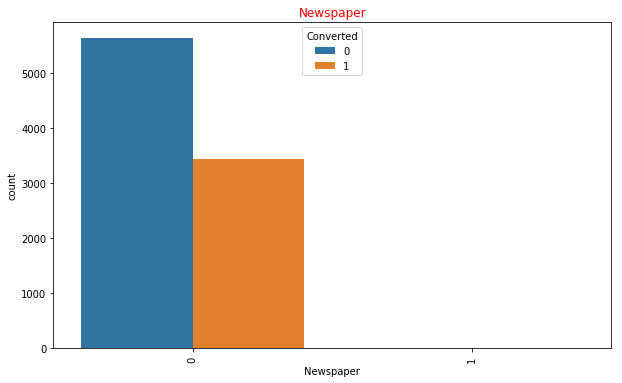

In [79]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Newspaper')
plt.title('Newspaper', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference

- This column is biased and is not useful for model. We can drop this column.

### Digital Advertisement

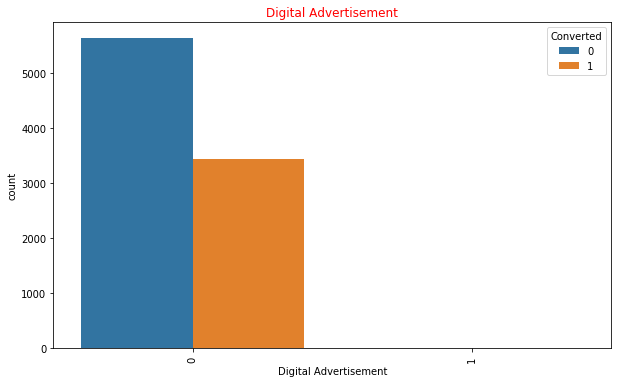

In [80]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Digital Advertisement')
plt.title('Digital Advertisement', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference

- This column is biased and not useful for the model. We can drop this column.

### Through Recommendations

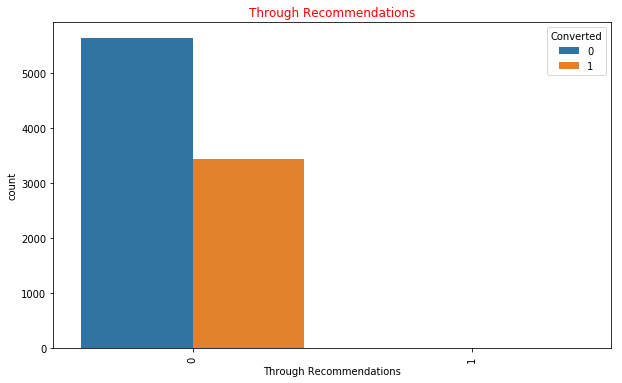

In [81]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Through Recommendations')
plt.title('Through Recommendations', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference

- This column is biased and is not useful for the model. We can drop this column.

### Receive More Updates About Our Courses

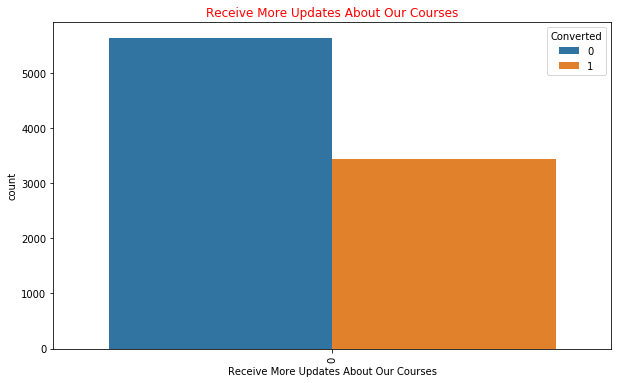

In [82]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Receive More Updates About Our Courses')
plt.title('Receive More Updates About Our Courses', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference

- This column contains only one category and won't provide much insight to model. We can drop this column.

### Tags

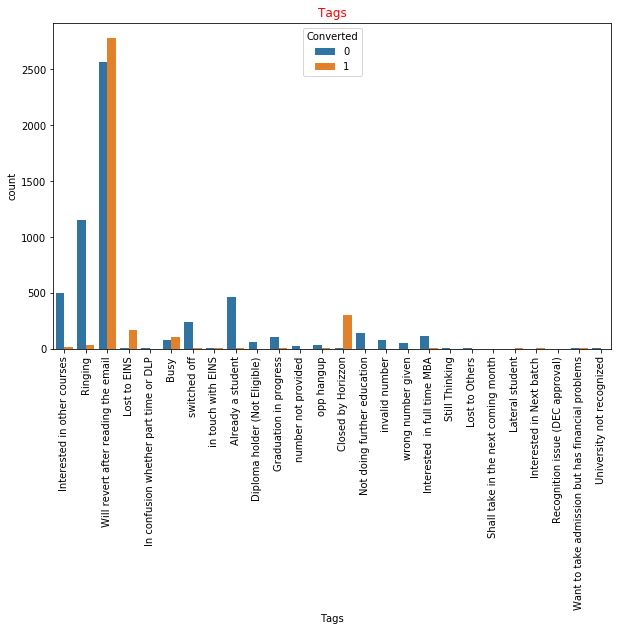

In [83]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Tags')
plt.title('Tags', color='Red')
plt.xticks(rotation=90)
plt.show()

In [84]:
#Let us combine low value tags together into Other Tags category.
lead_data['Tags'] = lead_data['Tags'].replace(['Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided',
                                               'number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems',
                                              'Still Thinking','In confusion whether part time or DLP','Interested in Next batch',
                                               'Lateral student','Shall take in the next coming month','University not recognized',
                                               'Recognition issue (DEC approval)'],'Other Tag')

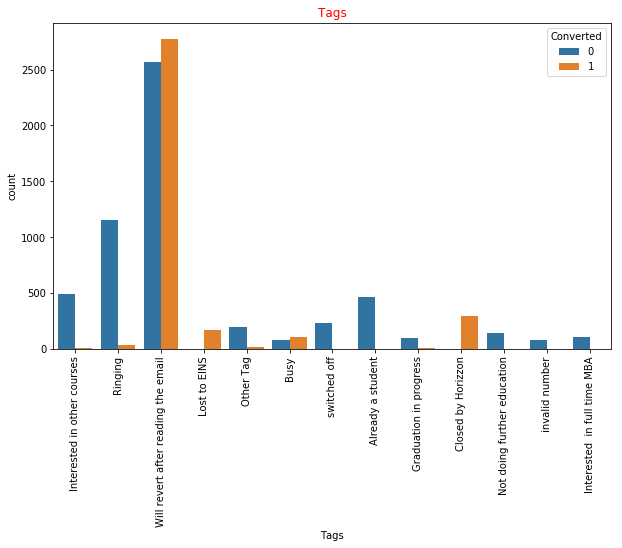

In [85]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Tags')
plt.title('Tags', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference

- Leads who are tagged as 'Will revert after reading the email' are showing best convertion rate.

### Update me on Supply Chain Content

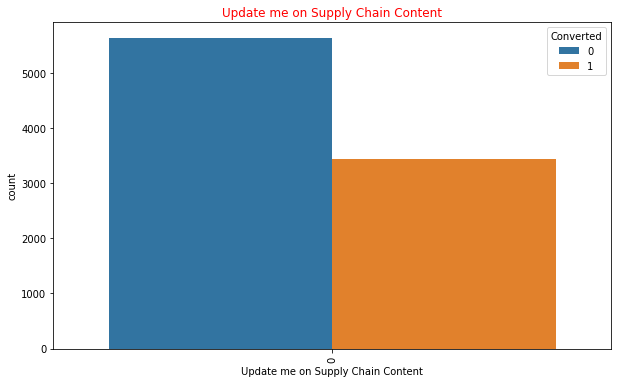

In [86]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Update me on Supply Chain Content')
plt.title('Update me on Supply Chain Content', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference

- This column has only one category and won't add value to our model. We can drop this column.

### Get updates on DM Content

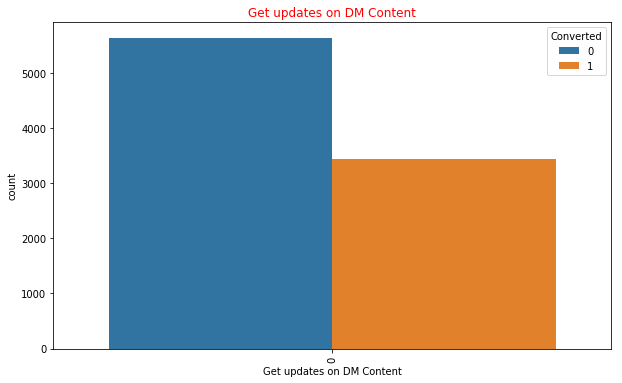

In [87]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Get updates on DM Content')
plt.title('Get updates on DM Content', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference

- This column has only one category and won't add value to our model. We can drop this column.

### City

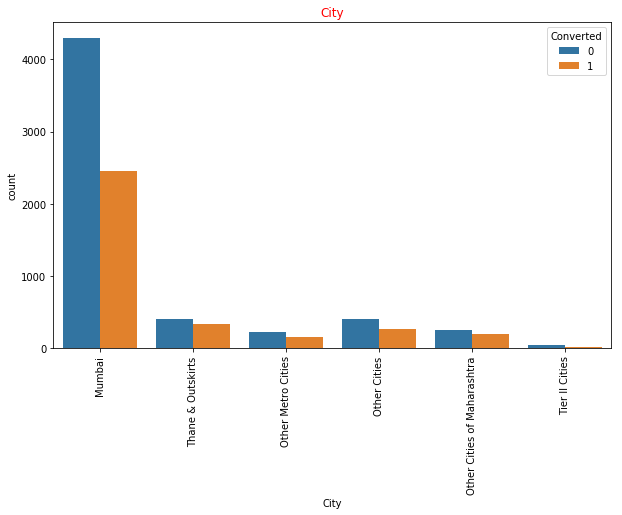

In [88]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'City')
plt.title('City', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference

- Most of the leads hail from Mumbai. So we can focus more on the people from Mumbai City to get good leads and good convertion rate.

### I agree to pay the amount through cheque

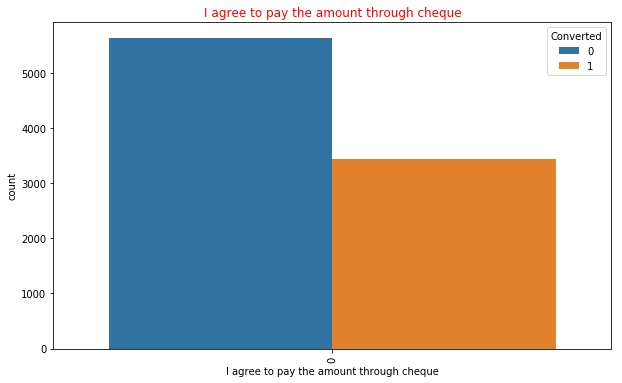

In [89]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'I agree to pay the amount through cheque')
plt.title('I agree to pay the amount through cheque', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference

- This column has only one category and won't be useful for our model. We can drop this column.

### A free copy of Mastering The Interview

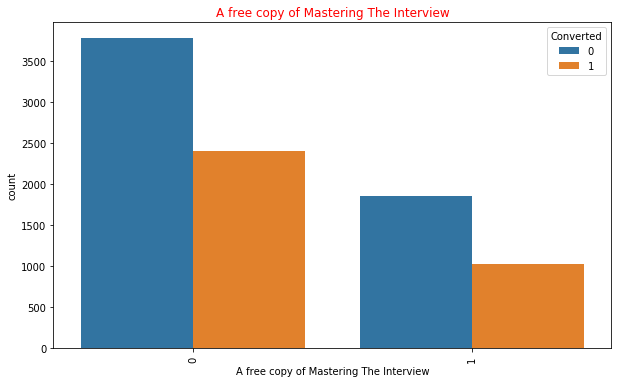

In [90]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'A free copy of Mastering The Interview')
plt.title('A free copy of Mastering The Interview', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference 

- Majority of people are not interested in the extra offering that is being provided. We can think of some other offer to interest the lead more.

### Last Notable Activity

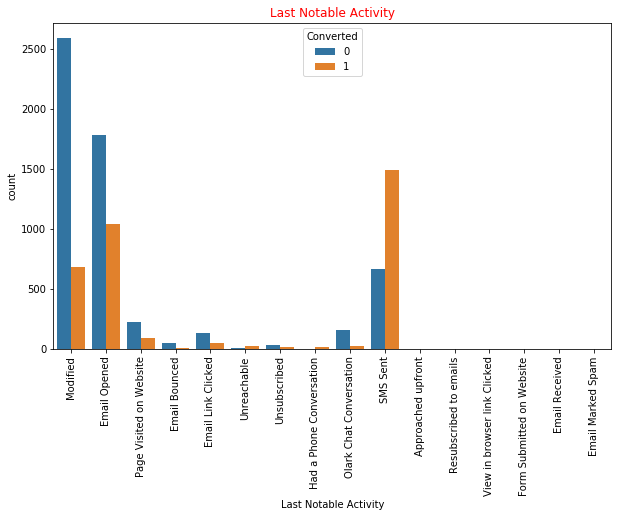

In [91]:
plt.figure(figsize=[10,6])
sns.countplot(data=lead_data, hue='Converted', x= 'Last Notable Activity')
plt.title('Last Notable Activity', color='Red')
plt.xticks(rotation=90)
plt.show()

#### Inference

- Leads whose last activity was SMS Sent show very high conversion rate. We can focus more on SMS based communication for better convertion of leads.

In [92]:
# Let us drop the columns that are irrelevant to the model as inferred from univariate analysis.

In [93]:
drop_column_list = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
                    'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                    'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                    'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

In [94]:
lead_data.drop(drop_column_list, axis=1, inplace=True)

In [95]:
lead_data.shape

(9074, 12)

In [96]:
lead_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Mumbai,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Mumbai,Modified


## Dummy Variable Creation

- Let us create dummy variables for categorical columns with multiple number of categories.

In [97]:
dummy_df = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source',
                                    'Last Activity','Specialization','Tags','City',
                                    'Last Notable Activity',
                                    'What is your current occupation']],drop_first=True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


- Let us combine lead_data and dummy_df together.

In [98]:
lead_data_final = pd.concat([lead_data,dummy_df],axis=1)
lead_data_final.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

- Let us drop the original columns from the dataframe.

In [99]:
lead_data_final.drop(['Lead Origin', 'Lead Source',
                      'Last Activity','Specialization','Tags','City',
                      'Last Notable Activity','What is your current occupation'],axis=1,inplace=True)
lead_data_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [100]:
lead_data_final.shape

(9074, 80)

## Train_Test_Split

In [101]:
from sklearn.model_selection import train_test_split
y = lead_data_final.pop('Converted')
X = lead_data_final

In [102]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [103]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [104]:
# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### Scaling

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


## Model Building

In [106]:
#### Building first model

In [107]:
import statsmodels.api as sm

In [108]:
# Model1
log_model1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           79
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.6
Date:                Mon, 17 Oct 2022   Deviance:                       3161.2
Time:                        23:28:45   Pearson chi2:                 1.28e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   18.8725   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
TotalVisits                                              0.1509      0.075      2.002      0.045       0.003       0.299
Total Time Spent on Website                              1.1757      0.056     20.892      0.000       1.065       1.286
Page Views Per Visit                                    -0.2559      0.084     -3.062      0.002      -0.420      -0.092
Lead Origin_Landing Page Submission                     -1.2932      0.186     -6.954      0.000      -1.658      -0.929
Lead Origin_Lead Add Form                                0.7285      1.282      0.568      0.570      -1.785       3.242
Lead Origin_Lead Import                                 27.1602   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                   -25.7919   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       0.2339      0.130      1.801      0.072      -0.021       0.489
Lead Source_Olark Chat                                   0.8624      0.209      4.131      0.000       0.453       1.271
Lead Source_Organic Search                               0.2942      0.177      1.659      0.097      -0.053       0.642
Lead Source_Other Sources                                0.3227      0.755      0.427      0.669      -1.157       1.803
Lead Source_Reference                                    2.0600      1.321      1.560      0.119      -0.528       4.648
Lead Source_Referral Sites                               0.0777      0.427      0.182      0.856      -0.758       0.914
Lead Source_Welingak Website                             4.0211      1.475      2.726      0.006       1.130       6.912
Last Activity_Email Bounced                             -2.4229      0.774     -3.129      0.002      -3.941      -0.905
Last Activity_Email Link Clicked                         0.8507      0.558      1.524      0.127      -0.243       1.945
Last Activity_Email Opened                              -0.0116      0.331     -0.035      0.972      -0.661       0.638
Last Activity_Form Submitted on Website                  0.0448      0.524      0.085      0.932      -0.983       1.073
Last Activity_Olark Chat Conversation                   -0.5841      0.342     -1.709      0.087      -1.254       0.086
Last Activity_Other Activity                             1.3000      1.051      1.237      0.216      -0.760       3.360
Last Activity_Page Visited on Website                    0.1276      0.379      0.336      0.737      -0.616       0.871
Last Activity_SMS Sent                                   0.8572      0.307      2.793      0.005       0.256       1.459
Last Activity_Un

### Using RFE for selecting top 20 features

In [109]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(log_reg, n_features_to_select= 20)             #Selecting top 20 features
rfe = rfe.fit(X_train, y_train)

In [110]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Other Sources', False, 60),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', False, 57),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', False, 44),
 ('Last Activity_Form Submitted on Website', False, 52),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 55),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 4),
 ('L

In [111]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Specialization_Other Specialization',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Assessing the model with StatsModels

In [112]:
#Model 2
X_train_sm = sm.add_constant(X_train[col])
log_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1637.8
Date:                Mon, 17 Oct 2022   Deviance:                       3275.5
Time:                        23:28:49   Pearson chi2:                 9.95e+03
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9447      0.362     -2.606      0.009      -1.655      -0.234
Total Time Spent on Website                              1.0602      0.050     21.354      0.000       0.963       1.158
Lead Origin_Landing Page Submission                     -1.7286      0.163    -10.606      0.000      -2.048      -1.409
Lead Origin_Lead Add Form                                2.2640      0.325      6.976      0.000       1.628       2.900
Lead Source_Welingak Website                             2.0878      0.798      2.615      0.009       0.523       3.653
Last Activity_Email Bounced                             -1.5221      0.428     -3.553      0.000      -2.362      -0.682
Last Activity_Other Activity                             1.8862      0.647      2.916      0.004       0.618       3.154
Last Activity_SMS Sent                                   0.8994      0.185      4.867      0.000       0.537       1.262
Specialization_Other Specialization                     -1.4781      0.164     -9.006      0.000      -1.800      -1.156
Tags_Busy                                                2.8342      0.318      8.924      0.000       2.212       3.457
Tags_Closed by Horizzon                                  8.6444      0.759     11.393      0.000       7.157      10.132
Tags_Lost to EINS                                        8.4935      0.761     11.168      0.000       7.003       9.984
Tags_Ringing                                            -1.4357      0.327     -4.396      0.000      -2.076      -0.796
Tags_Will revert after reading the email                 3.6277      0.216     16.824      0.000       3.205       4.050
Tags_invalid number                                    -21.2352   1.49e+04     -0.001      0.999   -2.91e+04    2.91e+04
Tags_switched off                                       -1.2699      0.585     -2.171      0.030      -2.416      -0.123
Last Notable Activity_Modified                          -1.2345      0.121    -10.223      0.000      -1.471      -0.998
Last Notable Activity_Olark Chat Conversation           -1.7365      0.381     -4.560      0.000      -2.483      -0.990
Last Notable Activity_SMS Sent                           1.4611      0.222      6.571      0.000       1.025       1.897
What is your current occupation_Unemployed              -1.5890      0.328     -4.840      0.000      -2.232      -0.946
What is your current occupation_Working Professional     1.0683      0.418      2.559      0.011       0.250       1.887
========================================================================================================================
"""

#### Let us check VIF as well

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,What is your current occupation_Unemployed,12.24
17,Last Notable Activity_SMS Sent,6.39
6,Last Activity_SMS Sent,6.13
1,Lead Origin_Landing Page Submission,5.37
12,Tags_Will revert after reading the email,4.79
7,Specialization_Other Specialization,3.98
15,Last Notable Activity_Modified,2.36
19,What is your current occupation_Working Profes...,1.93
2,Lead Origin_Lead Add Form,1.93
11,Tags_Ringing,1.91


#### Let us drop Tags_invalid number which has high p-value and rebuild the model

In [115]:
col1 = col.drop('Tags_invalid number')

In [116]:
#Model 3
X_train_sm = sm.add_constant(X_train[col1])
log_model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1640.1
Date:                Mon, 17 Oct 2022   Deviance:                       3280.3
Time:                        23:28:50   Pearson chi2:                 1.00e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9899      0.366     -2.707      0.007      -1.707      -0.273
Total Time Spent on Website                              1.0637      0.050     21.424      0.000       0.966       1.161
Lead Origin_Landing Page Submission                     -1.7411      0.163    -10.661      0.000      -2.061      -1.421
Lead Origin_Lead Add Form                                2.2742      0.325      6.987      0.000       1.636       2.912
Lead Source_Welingak Website                             2.0782      0.799      2.602      0.009       0.513       3.644
Last Activity_Email Bounced                             -1.5265      0.429     -3.561      0.000      -2.367      -0.686
Last Activity_Other Activity                             1.8933      0.650      2.913      0.004       0.619       3.167
Last Activity_SMS Sent                                   0.8986      0.185      4.855      0.000       0.536       1.261
Specialization_Other Specialization                     -1.4839      0.165     -9.019      0.000      -1.806      -1.161
Tags_Busy                                                2.9351      0.315      9.317      0.000       2.318       3.553
Tags_Closed by Horizzon                                  8.7366      0.758     11.521      0.000       7.250      10.223
Tags_Lost to EINS                                        8.5866      0.760     11.298      0.000       7.097      10.076
Tags_Ringing                                            -1.3338      0.324     -4.119      0.000      -1.969      -0.699
Tags_Will revert after reading the email                 3.7216      0.213     17.445      0.000       3.303       4.140
Tags_switched off                                       -1.1653      0.583     -1.997      0.046      -2.309      -0.022
Last Notable Activity_Modified                          -1.2329      0.121    -10.194      0.000      -1.470      -0.996
Last Notable Activity_Olark Chat Conversation           -1.7428      0.381     -4.570      0.000      -2.490      -0.995
Last Notable Activity_SMS Sent                           1.4479      0.222      6.515      0.000       1.012       1.883
What is your current occupation_Unemployed              -1.6279      0.331     -4.918      0.000      -2.277      -0.979
What is your current occupation_Working Professional     1.0470      0.421      2.486      0.013       0.222       1.873
========================================================================================================================
"""

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,12.00
16,Last Notable Activity_SMS Sent,6.39
6,Last Activity_SMS Sent,6.13
1,Lead Origin_Landing Page Submission,5.36
12,Tags_Will revert after reading the email,4.59
7,Specialization_Other Specialization,3.98
14,Last Notable Activity_Modified,2.35
2,Lead Origin_Lead Add Form,1.93
18,What is your current occupation_Working Profes...,1.92
11,Tags_Ringing,1.86


#### Let us drop What is your current occupation_Unemployed as it has high VIF

In [118]:
col2 = col1.drop('What is your current occupation_Unemployed')

In [119]:
#Model 4
X_train_sm = sm.add_constant(X_train[col2])
log_model4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1652.7
Date:                Mon, 17 Oct 2022   Deviance:                       3305.3
Time:                        23:28:50   Pearson chi2:                 9.83e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4390      0.236    -10.339      0.000      -2.901      -1.977
Total Time Spent on Website                              1.0678      0.050     21.566      0.000       0.971       1.165
Lead Origin_Landing Page Submission                     -1.7290      0.163    -10.612      0.000      -2.048      -1.410
Lead Origin_Lead Add Form                                2.3066      0.322      7.168      0.000       1.676       2.937
Lead Source_Welingak Website                             2.0409      0.797      2.560      0.010       0.479       3.603
Last Activity_Email Bounced                             -1.5198      0.430     -3.534      0.000      -2.363      -0.677
Last Activity_Other Activity                             1.8490      0.646      2.861      0.004       0.582       3.116
Last Activity_SMS Sent                                   0.8673      0.184      4.708      0.000       0.506       1.228
Specialization_Other Specialization                     -1.4995      0.165     -9.113      0.000      -1.822      -1.177
Tags_Busy                                                2.7856      0.310      8.973      0.000       2.177       3.394
Tags_Closed by Horizzon                                  8.5761      0.756     11.346      0.000       7.095      10.058
Tags_Lost to EINS                                        8.4338      0.758     11.130      0.000       6.949       9.919
Tags_Ringing                                            -1.5010      0.319     -4.704      0.000      -2.127      -0.876
Tags_Will revert after reading the email                 3.5782      0.207     17.291      0.000       3.173       3.984
Tags_switched off                                       -1.3285      0.581     -2.287      0.022      -2.467      -0.190
Last Notable Activity_Modified                          -1.2376      0.121    -10.265      0.000      -1.474      -1.001
Last Notable Activity_Olark Chat Conversation           -1.7233      0.375     -4.590      0.000      -2.459      -0.987
Last Notable Activity_SMS Sent                           1.4552      0.221      6.570      0.000       1.021       1.889
What is your current occupation_Working Professional     2.6112      0.277      9.441      0.000       2.069       3.153
========================================================================================================================
"""

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Notable Activity_SMS Sent,6.31
6,Last Activity_SMS Sent,6.11
12,Tags_Will revert after reading the email,3.46
1,Lead Origin_Landing Page Submission,3.16
7,Specialization_Other Specialization,2.69
14,Last Notable Activity_Modified,2.16
2,Lead Origin_Lead Add Form,1.84
11,Tags_Ringing,1.60
3,Lead Source_Welingak Website,1.38
9,Tags_Closed by Horizzon,1.28


#### Let us drop Last Notable Activity_SMS Sent as it has high VIF

In [121]:
col3 = col2.drop('Last Notable Activity_SMS Sent')

In [122]:
#Model 5
X_train_sm = sm.add_constant(X_train[col3])
log_model5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1674.9
Date:                Mon, 17 Oct 2022   Deviance:                       3349.7
Time:                        23:28:50   Pearson chi2:                 9.23e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2908      0.233     -9.811      0.000      -2.748      -1.833
Total Time Spent on Website                              1.0699      0.050     21.612      0.000       0.973       1.167
Lead Origin_Landing Page Submission                     -1.7234      0.163    -10.592      0.000      -2.042      -1.405
Lead Origin_Lead Add Form                                2.2472      0.321      6.994      0.000       1.617       2.877
Lead Source_Welingak Website                             1.9576      0.797      2.456      0.014       0.396       3.520
Last Activity_Email Bounced                             -1.3900      0.440     -3.161      0.002      -2.252      -0.528
Last Activity_Other Activity                             1.9213      0.652      2.948      0.003       0.644       3.199
Last Activity_SMS Sent                                   1.8877      0.100     18.923      0.000       1.692       2.083
Specialization_Other Specialization                     -1.4306      0.164     -8.731      0.000      -1.752      -1.109
Tags_Busy                                                2.8407      0.304      9.334      0.000       2.244       3.437
Tags_Closed by Horizzon                                  8.7768      0.759     11.568      0.000       7.290      10.264
Tags_Lost to EINS                                        8.5456      0.763     11.202      0.000       7.050      10.041
Tags_Ringing                                            -1.3197      0.314     -4.198      0.000      -1.936      -0.703
Tags_Will revert after reading the email                 3.5139      0.205     17.134      0.000       3.112       3.916
Tags_switched off                                       -1.1273      0.576     -1.956      0.050      -2.257       0.002
Last Notable Activity_Modified                          -1.7089      0.103    -16.517      0.000      -1.912      -1.506
Last Notable Activity_Olark Chat Conversation           -1.8618      0.374     -4.981      0.000      -2.594      -1.129
What is your current occupation_Working Professional     2.6695      0.277      9.627      0.000       2.126       3.213
========================================================================================================================
"""

In [123]:
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Will revert after reading the email,3.45
1,Lead Origin_Landing Page Submission,3.12
7,Specialization_Other Specialization,2.62
2,Lead Origin_Lead Add Form,1.83
14,Last Notable Activity_Modified,1.71
6,Last Activity_SMS Sent,1.69
11,Tags_Ringing,1.59
3,Lead Source_Welingak Website,1.37
9,Tags_Closed by Horizzon,1.28
0,Total Time Spent on Website,1.23


#### Let us drop Tags_switched off	

In [124]:
col4 = col3.drop('Tags_switched off')

In [125]:
#Model 6
X_train_sm = sm.add_constant(X_train[col4])
log_model6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1677.2
Date:                Mon, 17 Oct 2022   Deviance:                       3354.4
Time:                        23:28:50   Pearson chi2:                 8.23e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4606      0.227    -10.839      0.000      -2.906      -2.016
Total Time Spent on Website                              1.0705      0.049     21.628      0.000       0.974       1.168
Lead Origin_Landing Page Submission                     -1.7405      0.164    -10.641      0.000      -2.061      -1.420
Lead Origin_Lead Add Form                                2.2668      0.323      7.013      0.000       1.633       2.900
Lead Source_Welingak Website                             1.9398      0.797      2.432      0.015       0.377       3.503
Last Activity_Email Bounced                             -1.3937      0.440     -3.164      0.002      -2.257      -0.530
Last Activity_Other Activity                             1.9301      0.657      2.937      0.003       0.642       3.218
Last Activity_SMS Sent                                   1.8651      0.099     18.846      0.000       1.671       2.059
Specialization_Other Specialization                     -1.4456      0.165     -8.778      0.000      -1.768      -1.123
Tags_Busy                                                3.0386      0.295     10.310      0.000       2.461       3.616
Tags_Closed by Horizzon                                  8.9512      0.757     11.832      0.000       7.469      10.434
Tags_Lost to EINS                                        8.7230      0.760     11.471      0.000       7.233      10.213
Tags_Ringing                                            -1.1201      0.305     -3.677      0.000      -1.717      -0.523
Tags_Will revert after reading the email                 3.7014      0.194     19.121      0.000       3.322       4.081
Last Notable Activity_Modified                          -1.6975      0.103    -16.423      0.000      -1.900      -1.495
Last Notable Activity_Olark Chat Conversation           -1.8649      0.374     -4.984      0.000      -2.598      -1.132
What is your current occupation_Working Professional     2.6993      0.281      9.618      0.000       2.149       3.249
========================================================================================================================
"""

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Will revert after reading the email,3.23
1,Lead Origin_Landing Page Submission,2.89
7,Specialization_Other Specialization,2.52
2,Lead Origin_Lead Add Form,1.83
13,Last Notable Activity_Modified,1.71
6,Last Activity_SMS Sent,1.67
11,Tags_Ringing,1.53
3,Lead Source_Welingak Website,1.37
9,Tags_Closed by Horizzon,1.27
0,Total Time Spent on Website,1.23


#### Let us drop Last Activity_Other Activity

In [127]:
col5 = col4.drop('Last Activity_Other Activity')

In [128]:
#Model 7
X_train_sm = sm.add_constant(X_train[col5])
log_model7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1682.3
Date:                Mon, 17 Oct 2022   Deviance:                       3364.6
Time:                        23:28:51   Pearson chi2:                 8.25e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4552      0.228    -10.790      0.000      -2.901      -2.009
Total Time Spent on Website                              1.0716      0.049     21.693      0.000       0.975       1.168
Lead Origin_Landing Page Submission                     -1.7318      0.163    -10.592      0.000      -2.052      -1.411
Lead Origin_Lead Add Form                                2.2688      0.323      7.020      0.000       1.635       2.902
Lead Source_Welingak Website                             1.9335      0.797      2.425      0.015       0.370       3.496
Last Activity_Email Bounced                             -1.4143      0.440     -3.212      0.001      -2.277      -0.551
Last Activity_SMS Sent                                   1.8489      0.099     18.727      0.000       1.655       2.042
Specialization_Other Specialization                     -1.4455      0.165     -8.777      0.000      -1.768      -1.123
Tags_Busy                                                3.0352      0.295     10.305      0.000       2.458       3.613
Tags_Closed by Horizzon                                  9.0330      0.756     11.951      0.000       7.552      10.514
Tags_Lost to EINS                                        8.7187      0.760     11.472      0.000       7.229      10.208
Tags_Ringing                                            -1.1195      0.305     -3.676      0.000      -1.716      -0.523
Tags_Will revert after reading the email                 3.7058      0.194     19.142      0.000       3.326       4.085
Last Notable Activity_Modified                          -1.6912      0.103    -16.411      0.000      -1.893      -1.489
Last Notable Activity_Olark Chat Conversation           -1.8766      0.374     -5.014      0.000      -2.610      -1.143
What is your current occupation_Working Professional     2.7290      0.282      9.663      0.000       2.175       3.283
========================================================================================================================
"""

In [129]:
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,3.23
1,Lead Origin_Landing Page Submission,2.89
6,Specialization_Other Specialization,2.52
2,Lead Origin_Lead Add Form,1.83
12,Last Notable Activity_Modified,1.70
5,Last Activity_SMS Sent,1.67
10,Tags_Ringing,1.53
3,Lead Source_Welingak Website,1.37
8,Tags_Closed by Horizzon,1.27
0,Total Time Spent on Website,1.23


#### Let us drop Tags_Closed by Horizzon because it doesn't seem to be very business relevance.

In [130]:
col6 = col5.drop('Tags_Closed by Horizzon')

In [131]:
#Model 8
X_train_sm = sm.add_constant(X_train[col6])
log_model8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2035.4
Date:                Mon, 17 Oct 2022   Deviance:                       4070.8
Time:                        23:28:51   Pearson chi2:                 8.50e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7813      0.155     -5.048      0.000      -1.085      -0.478
Total Time Spent on Website                              1.0380      0.044     23.715      0.000       0.952       1.124
Lead Origin_Landing Page Submission                     -1.4709      0.141    -10.453      0.000      -1.747      -1.195
Lead Origin_Lead Add Form                                3.9127      0.283     13.832      0.000       3.358       4.467
Lead Source_Welingak Website                             1.6631      0.809      2.056      0.040       0.078       3.248
Last Activity_Email Bounced                             -1.7537      0.422     -4.155      0.000      -2.581      -0.926
Last Activity_SMS Sent                                   1.5157      0.089     17.124      0.000       1.342       1.689
Specialization_Other Specialization                     -1.3050      0.143     -9.114      0.000      -1.586      -1.024
Tags_Busy                                                1.2870      0.243      5.300      0.000       0.811       1.763
Tags_Lost to EINS                                        6.5681      0.737      8.913      0.000       5.124       8.012
Tags_Ringing                                            -2.9633      0.270    -10.963      0.000      -3.493      -2.434
Tags_Will revert after reading the email                 1.8161      0.107     16.938      0.000       1.606       2.026
Last Notable Activity_Modified                          -1.3182      0.089    -14.783      0.000      -1.493      -1.143
Last Notable Activity_Olark Chat Conversation           -1.6664      0.346     -4.811      0.000      -2.345      -0.987
What is your current occupation_Working Professional     2.6328      0.231     11.395      0.000       2.180       3.086
========================================================================================================================
"""

In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,2.98
1,Lead Origin_Landing Page Submission,2.74
6,Specialization_Other Specialization,2.44
11,Last Notable Activity_Modified,1.68
5,Last Activity_SMS Sent,1.66
2,Lead Origin_Lead Add Form,1.61
9,Tags_Ringing,1.50
3,Lead Source_Welingak Website,1.36
0,Total Time Spent on Website,1.21
13,What is your current occupation_Working Profes...,1.21


#### Let us drop Tags_Lost to EINS as it doesn't seem to be very business relevant

In [133]:
col7 = col6.drop('Tags_Lost to EINS')

In [134]:
#Model 9
X_train_sm = sm.add_constant(X_train[col7])
log_model9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2209.4
Date:                Mon, 17 Oct 2022   Deviance:                       4418.8
Time:                        23:28:51   Pearson chi2:                 7.55e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3620      0.143     -2.523      0.012      -0.643      -0.081
Total Time Spent on Website                              1.0408      0.042     24.902      0.000       0.959       1.123
Lead Origin_Landing Page Submission                     -1.3454      0.134    -10.063      0.000      -1.607      -1.083
Lead Origin_Lead Add Form                                3.6438      0.276     13.202      0.000       3.103       4.185
Lead Source_Welingak Website                             1.7255      0.788      2.188      0.029       0.180       3.271
Last Activity_Email Bounced                             -1.7596      0.394     -4.464      0.000      -2.532      -0.987
Last Activity_SMS Sent                                   1.4465      0.085     16.975      0.000       1.279       1.613
Specialization_Other Specialization                     -1.2098      0.137     -8.859      0.000      -1.477      -0.942
Tags_Busy                                                0.7746      0.236      3.282      0.001       0.312       1.237
Tags_Ringing                                            -3.3931      0.263    -12.913      0.000      -3.908      -2.878
Tags_Will revert after reading the email                 1.2797      0.093     13.774      0.000       1.098       1.462
Last Notable Activity_Modified                          -1.1910      0.084    -14.177      0.000      -1.356      -1.026
Last Notable Activity_Olark Chat Conversation           -1.5595      0.330     -4.733      0.000      -2.205      -0.914
What is your current occupation_Working Professional     2.4740      0.217     11.416      0.000       2.049       2.899
========================================================================================================================
"""

In [135]:
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,2.88
1,Lead Origin_Landing Page Submission,2.67
6,Specialization_Other Specialization,2.41
10,Last Notable Activity_Modified,1.67
5,Last Activity_SMS Sent,1.66
2,Lead Origin_Lead Add Form,1.60
8,Tags_Ringing,1.48
3,Lead Source_Welingak Website,1.36
12,What is your current occupation_Working Profes...,1.21
0,Total Time Spent on Website,1.20


In [136]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3271,4.0,157,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1490,5.0,1513,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7936,2.0,74,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4216,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3830,8.0,164,6.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### p-Value and VIF are well within the threshold values, hence we can consider this model for further analysis.

In [137]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.355589
1012    0.184647
9226    0.003560
4750    0.938721
7987    0.656554
1281    0.877918
2880    0.206680
4971    0.978972
7536    0.918683
1248    0.051599
dtype: float64

In [138]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35558857, 0.18464679, 0.00356026, 0.93872088, 0.65655398,
       0.87791783, 0.20668009, 0.97897168, 0.91868325, 0.05159937])

In [139]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.355589,3009
1,0,0.184647,1012
2,0,0.003560,9226
3,1,0.938721,4750
4,1,0.656554,7987


- Let us consider cut-off as 0.5 and create a new column with prediction as 1 if Converted_prob>0.5

In [140]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.355589,3009,0
1,0,0.184647,1012,0
2,0,0.003560,9226,0
3,1,0.938721,4750,1
4,1,0.656554,7987,1


In [141]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3550  355]
 [ 521 1925]]


In [142]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8620689655172413


### Checking other metrics

In [143]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
# Checking Sensitivity of model
TP / float(TP+FN)

0.7869991823385118

In [145]:
# Checking Specificity
TN / float(TN+FP)

0.9090909090909091

In [146]:
# Checking false postive rate
print(FP/ float(TN+FP))

0.09090909090909091


In [147]:
# Checking positive predictive value 
print (TP / float(TP+FP))

0.8442982456140351


In [148]:
# Checking Negative predictive value
print (TN / float(TN+ FN))

0.8720216163104888


### Plotting the ROC Curve
#### An ROC curve demonstrates several things:
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [149]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [150]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

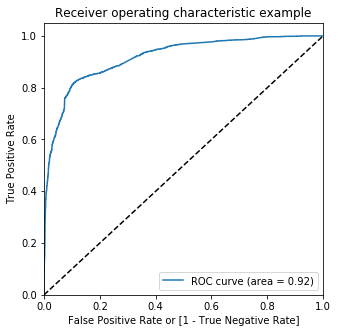

In [151]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Let us find the optimal cut-off point

In [152]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.355589,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.184647,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.003560,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.938721,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.656554,7987,1,1,1,1,1,1,1,1,0,0,0


In [153]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.707290  0.961161  0.548271
0.2   0.2  0.759093  0.928455  0.653009
0.3   0.3  0.820973  0.856909  0.798464
0.4   0.4  0.860967  0.827882  0.881690
0.5   0.5  0.862069  0.786999  0.909091
0.6   0.6  0.840655  0.686836  0.937004
0.7   0.7  0.827114  0.615699  0.959539
0.8   0.8  0.807904  0.534342  0.979257
0.9   0.9  0.766336  0.408013  0.990781


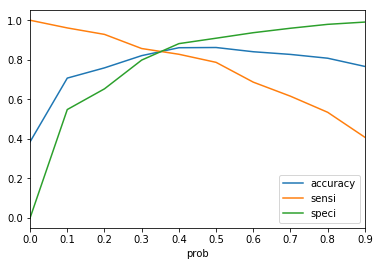

In [154]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()



##### - We can consider 0.35 as optimum cutoff probability

In [155]:
# From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.355589,3009,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.184647,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.003560,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.938721,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.656554,7987,1,1,1,1,1,1,1,1,0,0,0,1


### Assigning Lead score on training set

In [156]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.355589,3009,0,1,1,1,1,0,0,0,0,0,0,1,36
1,0,0.184647,1012,0,1,1,0,0,0,0,0,0,0,0,0,18
2,0,0.003560,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.938721,4750,1,1,1,1,1,1,1,1,1,1,1,1,94
4,1,0.656554,7987,1,1,1,1,1,1,1,1,0,0,0,1,66


In [157]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

0.8475830577861754
[[3322  583]
 [ 385 2061]]


In [158]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8426001635322976

In [159]:
# Checking specificity
TN / float(TN+FP)

0.8507042253521127

In [160]:
# Checking false postive rate
print(FP/ float(TN+FP))

0.14929577464788732


In [161]:
# Checking Negative predictive value
print (TN / float(TN+ FN))

0.8961424332344213


## Precision and Recall

In [162]:
#confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3550,  355],
       [ 521, 1925]], dtype=int64)

In [163]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8442982456140351

In [164]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7869991823385118

In [165]:
from sklearn.metrics import precision_score, recall_score

In [166]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.8442982456140351

In [167]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7869991823385118

### Precision-Recall Tradeoff

In [168]:
from sklearn.metrics import precision_recall_curve

In [169]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [170]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

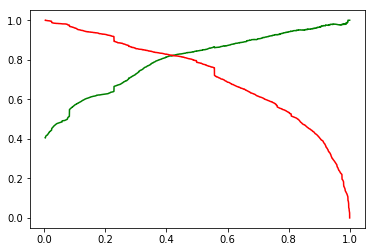

In [171]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Prediction on test set

In [172]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3271,0.284772,-0.600595,0.955505,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1490,0.643547,1.887326,1.510766,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7936,-0.432779,-0.752879,-0.155018,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4216,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3830,1.719873,-0.587751,2.066027,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [173]:
#Taking the columns used in our final model present in list col7
X_test = X_test[col7]


In [174]:
X_test_sm = sm.add_constant(X_test)

In [175]:
y_test_pred = res.predict(X_test_sm)

In [176]:
y_test_pred[:10]

3271    0.285524
1490    0.982201
7936    0.254316
4216    0.762393
3830    0.261244
1800    0.780140
6507    0.012962
4821    0.209163
4223    0.979632
4714    0.276561
dtype: float64

In [177]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.285524
1490,0.982201
7936,0.254316
4216,0.762393
3830,0.261244


In [178]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [179]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [180]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [181]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [182]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.285524
1,1,1490,0.982201
2,0,7936,0.254316
3,1,4216,0.762393
4,0,3830,0.261244


In [183]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [184]:
# Rearranging the columns
columns_titles = ['Prospect ID','Converted','Converted_prob']
y_pred_final=y_pred_final.reindex(columns=columns_titles)

In [185]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.285524
1,1490,1,0.982201
2,7936,0,0.254316
3,4216,1,0.762393
4,3830,0,0.261244


In [186]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [187]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.285524,0
1,1490,1,0.982201,1
2,7936,0,0.254316,0
3,4216,1,0.762393,1
4,3830,0,0.261244,0


### Checking Accuracy on test set.

In [188]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8340066103562247

In [189]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion2)

[[1457  277]
 [ 175  814]]


In [190]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [191]:
#Sensitivity
TP / float(TP+FN)

0.8230535894843276

In [192]:
#Specificity
TN / float(TN+FP)

0.8402537485582469

#### Assigning Lead Score to test data set

In [193]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head(10)

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.285524,0,29
1,1490,1,0.982201,1,98
2,7936,0,0.254316,0,25
3,4216,1,0.762393,1,76
4,3830,0,0.261244,0,26
5,1800,1,0.780140,1,78
6,6507,0,0.012962,0,1
7,4821,0,0.209163,0,21
8,4223,1,0.979632,1,98
9,4714,0,0.276561,0,28
